In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
import os

import warnings
# filter warnings
warnings.filterwarnings('ignore')


import os
print(os.listdir(r"C:\Users\20205228\OneDrive - TU Eindhoven\Desktop\Hack4Good\New dataset\Fruit Dataset - two classes"))
from subprocess import check_output

['.ipynb_checkpoints', 'first_try_food_waste_two_classes_model.h5', 'old test', 'old train', 'second_try_food_waste_model.h5', 'test', 'train', 'Two Classes - Fruit freshness and rottenness detection.ipynb', 'Two Classes - Fruit Pretty and Ugly detection.ipynb', 'Untitled.ipynb']


In [2]:
np.random.seed(1234)
directory= r"C:\Users\20205228\OneDrive - TU Eindhoven\Desktop\Hack4Good\New dataset\Fruit Dataset - two classes\train"
classes=["Pretty","Ugly"]

all_arrays=[]
img_size=100
for i in classes:
    path=os.path.join(directory,i)
    class_num=classes.index(i)
    for img in os.listdir(path):
        #img_array=cv2.imread(os.path.join(path,img),
        #                     cv2.IMREAD_GRAYSCALE)
        img_array=cv2.imread(os.path.join(path,img))
        img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        img_array=cv2.resize(img_array,(img_size,img_size))
        all_arrays.append([img_array,class_num])

In [3]:
directory2 = r"C:\Users\20205228\OneDrive - TU Eindhoven\Desktop\Hack4Good\New dataset\Fruit Dataset - two classes\test"
classes2 =["Pretty","Ugly"]

all_arrays2=[]
img_size=100
for i in classes2:
    path=os.path.join(directory2,i)
    class_num2=classes2.index(i)
    for img in os.listdir(path):
        #img_array2=cv2.imread(os.path.join(path,img),
        #                     cv2.IMREAD_GRAYSCALE)
        img_array2=cv2.imread(os.path.join(path,img))
        img_array2=cv2.cvtColor(img_array2, cv2.COLOR_BGR2RGB)
        img_array2=cv2.resize(img_array2,(img_size,img_size))
        all_arrays2.append([img_array2,class_num2])

In [4]:
import random
random.shuffle(all_arrays)

X_train=[]
Y_train=[]
for features,label in all_arrays:
    X_train.append(features)
    Y_train.append(label)
X_train=np.array(X_train) #arraying

import random
random.shuffle(all_arrays2)

X_test=[]
Y_test=[]
for features,label in all_arrays2:
    X_test.append(features)
    Y_test.append(label)
X_test=np.array(X_test) #arraying

In [5]:
#normalization and reshaping
X_train=X_train.reshape(-1,img_size,img_size,3)
X_train=X_train/255
X_test=X_test.reshape(-1,img_size,img_size,3)
X_test=X_test/255
print("shape of X_train= ",X_train.shape)
print("shape of X_test=  ",X_test.shape)

shape of X_train=  (10901, 100, 100, 3)
shape of X_test=   (2310, 100, 100, 3)


In [6]:
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
Y_train=to_categorical(Y_train,num_classes=2)
Y_test=to_categorical(Y_test,num_classes=2)

In [7]:
Y_train.shape

(10901, 2)

In [8]:
Y_test.shape

(2310, 2)

In [9]:
from sklearn.model_selection import  train_test_split
x_train,x_val,y_train,y_val=train_test_split(X_train,Y_train,test_size=0.2,random_state=42)

In [10]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

from keras.callbacks import ReduceLROnPlateau


model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(3,3),padding="Same",activation="relu",input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=16,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.35))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2,activation="softmax"))
#defining optimizer
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)
#compile the model
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

epochs=50
batch_size=18

In [11]:
datagen=ImageDataGenerator(featurewise_center=False, #set input mean to 0
                           samplewise_center=False,  #set each sample mean to 0
                           featurewise_std_normalization=False, #divide input datas to std
                           samplewise_std_normalization=False,  #divide each datas to own std
                           zca_whitening=False,  #dimension reduction
                           rotation_range=0.5,    #rotate 5 degree
                           zoom_range=0.5,        #zoom in-out 5%
                           width_shift_range=0.5, #shift 5%
                           height_shift_range=0.5,
                           horizontal_flip=False,  #randomly flip images
                           vertical_flip=False,
                           )
datagen.fit(x_train)

#model fitting
history=model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),epochs=epochs,
                            validation_data=(x_val,y_val),steps_per_epoch=x_train.shape[0]//batch_size
                           )


Epoch 1/50
484/484 [==============================] - 69s 141ms/step - loss: 0.6446 - accuracy: 0.6264 - val_loss: 0.5652 - val_accuracy: 0.7199
Epoch 2/50
484/484 [==============================] - 70s 143ms/step - loss: 0.5163 - accuracy: 0.7547 - val_loss: 0.4515 - val_accuracy: 0.7937
Epoch 3/50
484/484 [==============================] - 77s 159ms/step - loss: 0.4390 - accuracy: 0.8046 - val_loss: 0.4073 - val_accuracy: 0.7992
Epoch 4/50
484/484 [==============================] - 71s 148ms/step - loss: 0.4032 - accuracy: 0.8264 - val_loss: 0.3706 - val_accuracy: 0.8418
Epoch 5/50
484/484 [==============================] - 66s 136ms/step - loss: 0.3639 - accuracy: 0.8482 - val_loss: 0.4499 - val_accuracy: 0.7836
Epoch 6/50
484/484 [==============================] - 68s 140ms/step - loss: 0.3550 - accuracy: 0.8472 - val_loss: 0.3563 - val_accuracy: 0.8510
Epoch 7/50
484/484 [==============================] - 73s 150ms/step - loss: 0.3525 - accuracy: 0.8472 - val_loss: 0.3389 - val_ac

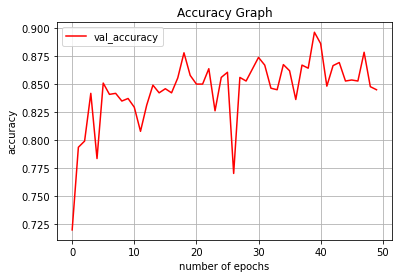

In [12]:
plt.plot(history.history["val_accuracy"],color="r",label="val_accuracy")
plt.title("Accuracy Graph")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.show()

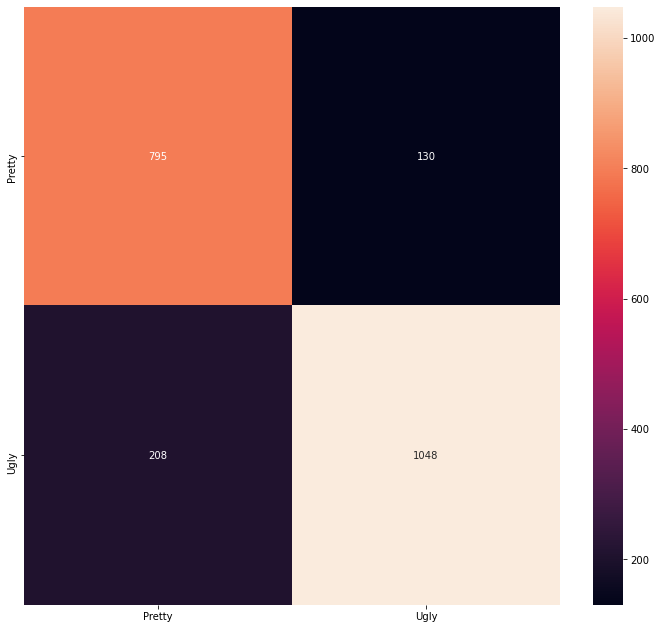

In [13]:
#confusion matrix
y_pred=model.predict(x_val)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_val,axis=1)
#compute conf mat
conf_mat=confusion_matrix(y_true,y_pred_classes)
#plot the con mat
fruit_names=["Pretty","Ugly"]
f,ax=plt.subplots(figsize=(12,11))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
plt.show()

In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_true,y_pred_classes))
# 0 = Pretty
# 1 = Ugly

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       925
           1       0.89      0.83      0.86      1256

    accuracy                           0.85      2181
   macro avg       0.84      0.85      0.84      2181
weighted avg       0.85      0.85      0.85      2181



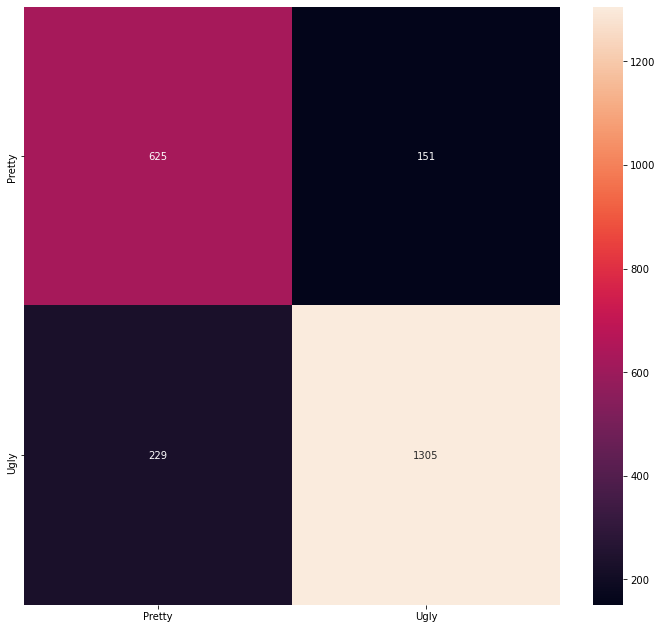

In [15]:
#confusion matrix
y_pred2=model.predict(X_test)
y_pred_classes2=np.argmax(y_pred2,axis=1)
y_true2=np.argmax(Y_test,axis=1)
#compute conf mat
conf_mat2=confusion_matrix(y_true2,y_pred_classes2)
#plot the con mat
f,ax=plt.subplots(figsize=(12,11))
sns.heatmap(conf_mat2,annot=True,fmt=".0f")
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
plt.show()

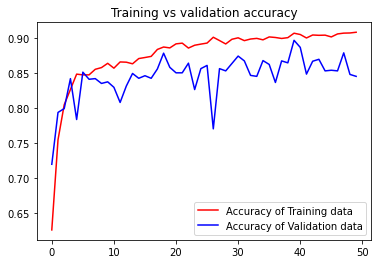

<Figure size 432x288 with 0 Axes>

In [16]:
get_acc = history.history['accuracy']
value_acc = history.history['val_accuracy']
get_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

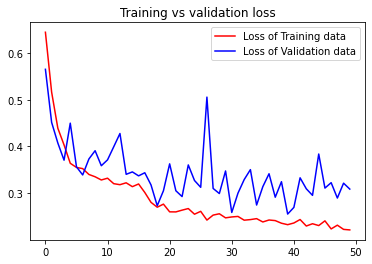

<Figure size 432x288 with 0 Axes>

In [17]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

#Test new imported image

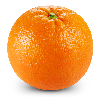

In [18]:
from keras.preprocessing.image import load_img

load_img(r"C:\Users\20205228\OneDrive - TU Eindhoven\Desktop\Orange.jpg",target_size=(100,100))

In [19]:
from keras.preprocessing.image import img_to_array



image=load_img(r"C:\Users\20205228\OneDrive - TU Eindhoven\Desktop\Orange.jpg",target_size=(100,100))
image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

In [20]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

prediction=model.predict(prediction_image)
value=np.argmax(prediction)
printmd("***Prediction is {}!***".format(fruit_names[value]))

***Prediction is Pretty!***

In [21]:
#model.save_weights('first_try_food_waste_model.h5')

In [23]:
#model.save('Last_try_food_waste_model.h5')